In [1]:
import sklearn
import csv
import pandas as pd
from sklearn import datasets

#Load dataset
data= pd.read_csv("spamfinal.csv")
data.head()

,Unnamed: 0,Category,Message,Emoji,Mathemtical symbols,URL,shorthands,Dot,length,capitals,Num_Phone,Special characters,word_count,mis_spell
0,0,ham,"Go until jurong point, crazy.. Available only ...",0,0,0,3,3,111,0,0,0,20,1
1,1,ham,Ok lar... Joking wif u oni...,0,0,0,3,2,29,0,0,0,6,1
2,2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,0,0,0,3,0,155,2,1,1,28,1
3,3,ham,U dun say so early hor... U c already then say...,0,0,0,4,2,49,2,0,0,11,1
4,4,ham,"Nah I don't think he goes to usf, he lives aro...",0,0,0,1,0,61,1,0,0,13,1


In [2]:
# Import train_test_split function
from sklearn.model_selection import train_test_split

X=data[['Emoji', 'Mathemtical symbols', 'URL', 'shorthands','Dot','length','capitals','Num_Phone','Special characters','word_count','mis_spell']]  # Features
y=data['Category']  # Labels

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) # 70% training and 30% test

In [4]:
#Import svm model
from sklearn import svm

#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [5]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


Accuracy: 0.9401913875598086


In [6]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(y_test, y_pred,average="macro"))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y_test, y_pred,average="macro"))

Precision: 0.9164438502673797
Recall: 0.8235446862754355


In [7]:
from sklearn import metrics
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
p=[]
r=[]
accuracy=[]
t=[0.5,0.4,0.3,0.2,0.1]
for i in t:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=i)
    #Create a Gaussian Classifier
    clf=svm.SVC(kernel='linear')

    #Train the model using the training sets y_pred=clf.predict(X_test)
    clf.fit(X_train,y_train)

    y_pred=clf.predict(X_test)
    print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
    accuracy.append(metrics.accuracy_score(y_test, y_pred))
    p.append(precision_score(y_test, y_pred, average="macro"))
    r.append(recall_score(y_test, y_pred, average="macro"))
    print("Precision",precision_score(y_test, y_pred, average="macro"))
    print("recall",recall_score(y_test, y_pred, average="macro"))     
    

Accuracy: 0.9440057430007178
Precision 0.9195142489917121
recall 0.8260161391213146
Accuracy: 0.9519964109466128
Precision 0.9342851655981328
recall 0.8526340951852195
Accuracy: 0.9491626794258373
Precision 0.9496754648108487
recall 0.8298347705481517
Accuracy: 0.9479820627802691
Precision 0.932164326901169
recall 0.8369131551620484
Accuracy: 0.9408602150537635
Precision 0.9243951612903225
recall 0.8310336081166771


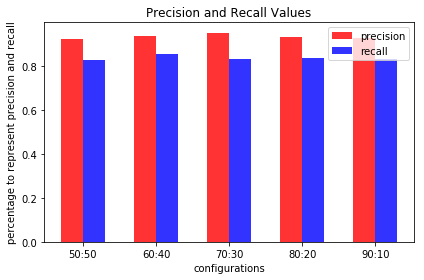

In [9]:
#plotting precision and recall
import matplotlib.pyplot as plt
import numpy as np
n_groups=5
index = np.arange(n_groups)
bar_width = 0.3
opacity = 0.8
rects1 = plt.bar(index, p, bar_width,
                 alpha=opacity,
                 color='r',
                 label='precision')
rects2 = plt.bar(index+bar_width, r, bar_width, alpha=opacity, color='b', label='recall')
plt.xlabel('configurations')
plt.ylabel('percentage to represent precision and recall')
plt.title('Precision and Recall Values')
plt.xticks(index+0.15, ('50:50', '60:40', '70:30', '80:20', '90:10'))
plt.legend(loc=1)
 
plt.tight_layout()
plt.savefig("svm1.jpg",dpi=300)
plt.show()

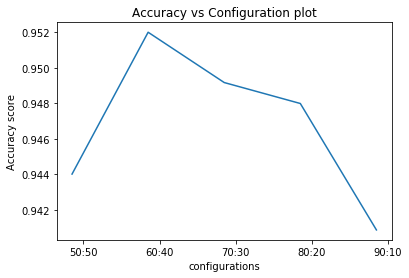

In [10]:
import matplotlib.pyplot as plt
n_groups=5
index = np.arange(n_groups)
plt.plot(accuracy)
plt.xlabel('configurations')
plt.ylabel('Accuracy score')
plt.title('Accuracy vs Configuration plot')
plt.xticks(index+0.15, ('50:50', '60:40', '70:30', '80:20', '90:10'))
plt.savefig("svm2.jpg",dpi=300)
plt.show()